In [4]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Bitcoin
ticker_symbol = 'BTC-USD'

# Download historical data for Bitcoin
bitcoin_data = yf.download(ticker_symbol, start='2010-07-17', progress=True)

# Display the first few rows of the data
print(bitcoin_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD     BTC-USD   
Date                                                                     
2014-09-17  457.334015  457.334015  468.174011  452.421997  465.864014   
2014-09-18  424.440002  424.440002  456.859985  413.104004  456.859985   
2014-09-19  394.795990  394.795990  427.834991  384.532013  424.102997   
2014-09-20  408.903992  408.903992  423.295990  389.882996  394.673004   
2014-09-21  398.821014  398.821014  412.425995  393.181000  408.084991   

Price         Volume  
Ticker       BTC-USD  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


In [34]:
import pandas as pd
import numpy as np

def ema_rsi(data, n=14, column='Close'):
    """
    Calculate RSI using Exponential Moving Averages (EMA).
    
    Parameters:
    data (pandas.DataFrame): DataFrame with price data
    n (int): Period for RSI calculation (default: 14)
    column (str): Name of price column (default: 'Close')
    
    Returns:
    pandas.Series: RSI values calculated using EMA
    """
    # Calculate price changes
    delta = data[column].diff()
    
    # Create two series: one for gains, one for losses
    gains = delta.copy()
    losses = delta.copy()
    
    gains[gains < 0] = 0  # Remove negative values from gains
    losses[losses > 0] = 0  # Remove positive values from losses
    losses = abs(losses)  # Make losses positive
    
    # Calculate EMAs of gains and losses
    # The smoothing factor (alpha) for EMA is 2/(n+1)
    alpha = 2 / (n + 1)
    
    # Calculate EMAs
    avg_gains = gains.ewm(alpha=alpha, adjust=False).mean()
    avg_losses = losses.ewm(alpha=alpha, adjust=False).mean()
    
    # Calculate RS (Relative Strength)
    rs = avg_gains / avg_losses
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def compare_rsi_methods(data, n=14, column='Close'):
    """
    Compare EMA RSI with Wilder's RSI
    
    Parameters:
    data (pandas.DataFrame): DataFrame with price data
    n (int): Period for RSI calculation (default: 14)
    column (str): Name of price column (default: 'Close')
    
    Returns:
    pandas.DataFrame: DataFrame with both RSI calculations
    """
    # Calculate EMA RSI
    data['EMA_RSI'] = ema_rsi(data, n, column)
    
    # Calculate Wilder's RSI for comparison
    # First calculate price changes
    delta = data[column].diff()
    
    # Separate gains and losses
    gains = delta.copy()
    losses = delta.copy()
    gains[gains < 0] = 0
    losses[losses > 0] = 0
    losses = abs(losses)
    
    # Calculate initial averages
    avg_gains = gains.rolling(window=n).mean()
    avg_losses = losses.rolling(window=n).mean()
    
    # Apply Wilder's smoothing
    for i in range(n, len(data)):
        avg_gains.iloc[i] = (avg_gains.iloc[i-1] * (n-1) + gains.iloc[i]) / n
        avg_losses.iloc[i] = (avg_losses.iloc[i-1] * (n-1) + losses.iloc[i]) / n
    
    # Calculate Wilder's RSI
    rs = avg_gains / avg_losses
    data['Wilders_RSI'] = 100 - (100 / (1 + rs))
    
    return data

# Example usage and testing
def test_ema_rsi():
    # Create sample data
    dates = pd.date_range(start='2024-01-01', periods=50)
    prices = [
        100, 102, 104, 103, 105, 107, 108, 107, 106, 105,
        103, 102, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 109, 108, 107, 106, 105, 104, 103, 102,
        101, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 111, 110, 109, 108, 107, 106
    ]
    
    df = pd.DataFrame({
        'Date': dates,
        'Close': prices
    }).set_index('Date')
    
    # Compare both methods
    df = compare_rsi_methods(df)
    
    # Print results
    print("\nFirst few rows (showing initial values):")
    print(df.head(15))
    
    print("\nLast few rows (showing both RSI calculations):")
    print(df.tail())
    
    # Compare statistics
    print("\nEMA RSI Statistics:")
    print(df['EMA_RSI'].describe())
    
    print("\nWilder's RSI Statistics:")
    print(df['Wilders_RSI'].describe())
    
    # Calculate the difference between methods
    df['RSI_Difference'] = abs(df['EMA_RSI'] - df['Wilders_RSI'])
    print("\nAverage absolute difference between methods:", df['RSI_Difference'].mean())

if __name__ == "__main__":
    test_ema_rsi()


First few rows (showing initial values):
            Close     EMA_RSI  Wilders_RSI
Date                                      
2024-01-01    100         NaN          NaN
2024-01-02    102  100.000000          NaN
2024-01-03    104  100.000000          NaN
2024-01-04    103   92.857143          NaN
2024-01-05    105   93.867925          NaN
2024-01-06    107   94.728634          NaN
2024-01-07    108   95.123521          NaN
2024-01-08    107   87.555515          NaN
2024-01-09    106   80.193749          NaN
2024-01-10    105   73.101669          NaN
2024-01-11    103   60.711386          NaN
2024-01-12    102   55.303535          NaN
2024-01-13    101   50.149266          NaN
2024-01-14    102   54.989597          NaN
2024-01-15    103   59.524270          NaN

Last few rows (showing both RSI calculations):
            Close    EMA_RSI  Wilders_RSI
Date                                     
2024-02-15    110  64.350301          NaN
2024-02-16    109  55.798648          NaN
2024-02-17 

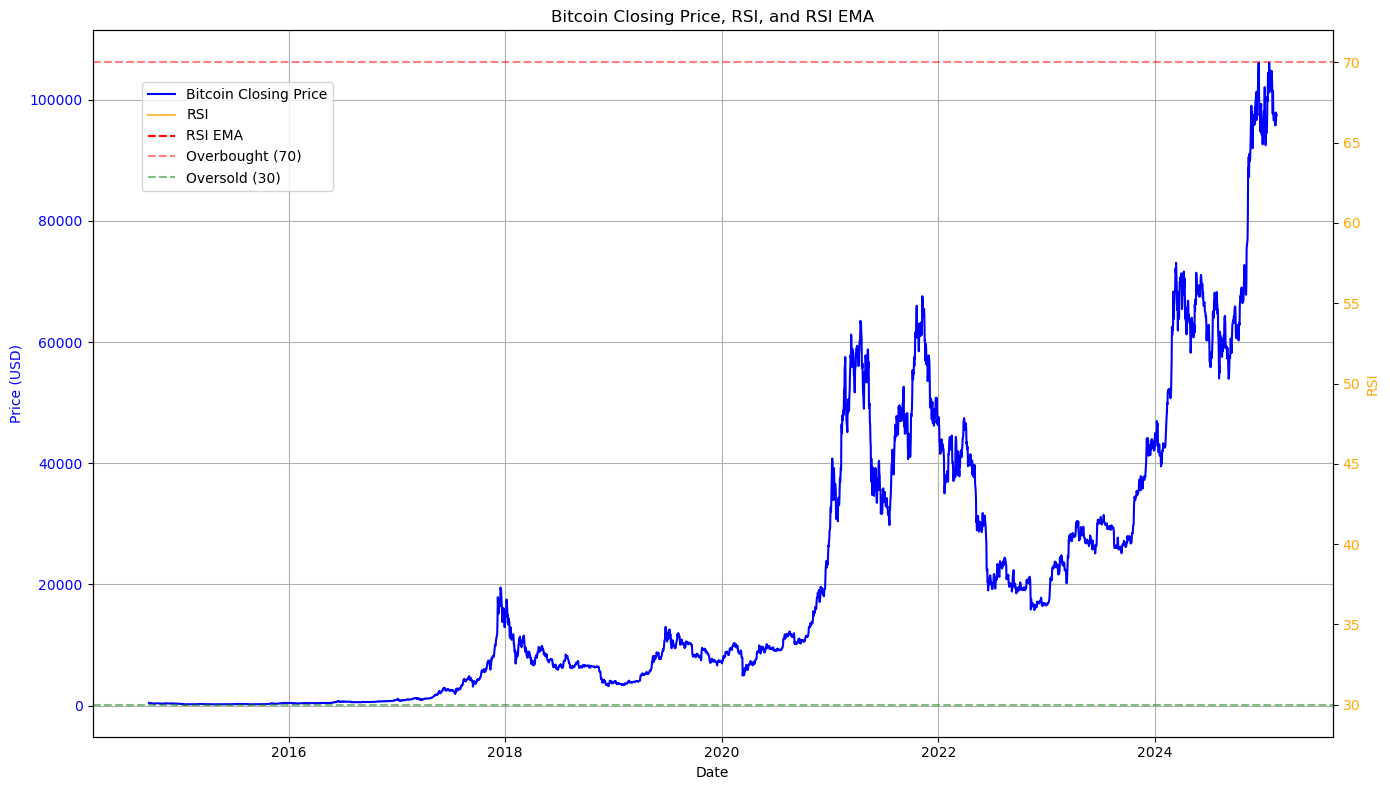

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate EMA (Exponential Moving Average)
def calculate_ema(data, column, span=14):
    return data[column].ewm(span=span, adjust=False).mean()

# Calculate the EMA of the RSI
bitcoin_data['RSI_EMA'] = calculate_ema(bitcoin_data, 'RSI')

# Create a figure and a primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Bitcoin closing prices on the primary axis (left y-axis)
ax1.plot(bitcoin_data.index, bitcoin_data['Close'], label='Bitcoin Closing Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary axis for RSI and RSI EMA (right y-axis)
ax2 = ax1.twinx()
ax2.plot(bitcoin_data.index, bitcoin_data['RSI'], label='RSI', color='orange', alpha=0.7)
ax2.plot(bitcoin_data.index, bitcoin_data['RSI_EMA'], label='RSI EMA', color='red', linestyle='--')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)', alpha=0.5)
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)', alpha=0.5)
ax2.set_ylabel('RSI', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and legends
plt.title('Bitcoin Closing Price, RSI, and RSI EMA')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()